<a href="https://colab.research.google.com/github/daniiomir/prohack_mckinsey_2020/blob/master/prohack_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание

“Beeep…Beeeep….Beeeep… Hooomans*, are you there?...”

This very strange transmission is coming from your narrowband radio signal receiver, pointed towards one of the farthest away galaxies. It’s early morning, you are sitting in your radio observatory high in the mountains.

For the last 10 years you’ve been a Chief Data Scientist in one of the best astrophysics research teams in the world. You are enjoying a quiet time with a cup of coffee and reviewing the data reports from last night, when this strange sound arrived. You almost spill your coffee in surprise. “Am I dreaming?” is your first thought as you move closer towards the speaker and listen…

“Beep…Beeeep….Beeeep… To all Hooomans who can hear us – we need your help”

You lean closer and grab a notebook and a pencil – you don’t really trust computers when it comes to such important tasks as taking notes from a radio transmission. You start recording everything that the strange voice from light years away is saying.

“… We need serious Data Science help and we know you Hooomans are the best at it…. We are an intergalactic species which have almost achieved singularity and the highest possible levels of development. We travel fast through space and explore other galaxies”

“The only essence that we consume is energy, measured in DSML units…Our populace is widespread and we live across many different star clusters and galaxies. What we need now is to optimize our well-being across all those galaxies… We have a lot of data but our сomputers and methods are too weak – we urgently need your data science knowledge to help us”

“Only two steps prevent us from achieving singularity

       · To understand what makes us better off.

              Our elders used the composite index to measure our well-being performance, but this knowledge has disappeared in the sands of time.

              Use our data and train your model to predict this index with the highest possible level of certainty.

       · To achieve the highest possible level of well-being through optimized allocation of additional energy

              We have discovered the star of an unusually high energy of 50000 zillion DSML.

              We have agreed between ourselves that 

       · no one galaxy will consume more than 100 zillion DSML 

and 

       · at least 10% of the total energy will be consumed by galaxies in need with existence expectancy index below 0,7.

Think of our galaxies as your “countries” (or how you call them??) and our population as citizens. We have similar healthcare and wellbeing characteristic as you, Hooomans”

“We are sending all the data to you right now. Let the data be with you, Hoomans… … …”

Transmission suddenly ends. You put your notebook and pencil away and start thinking. You really want to help this species optimize their well-being. You open up Python and upload the dataset from the narrowband radio signal receiver. It will be another great day at the observatory today.

————

* probably intergalactic species meant to say “humans” here but we will never know for sure

# FAQ

The solutions are evaluated on two criteria: predicted future Index values and allocated energy from a newly discovered star

1) Index predictions are evaluated using RMSE metric

2) Energy allocation is also evaluated using RMSE metric and has a set of known factors that need to be taken into account.

Every galaxy has a certain limited potential for improvement in the index described by the following function: 
Potential for increase in the Index = -np.log(Index+0.01)+3

Likely index increase dependent on potential for improvement and on extra energy availability is described by the following function:
Likely increase in the Index = extra energy * Potential for increase in the Index **2 / 1000

There are also several constraints:
in total there are 50000 zillion DSML available for allocation
no galaxy should be allocated more than 100 zillion DSML or less than 0 zillion DSML
galaxies with low existence expectancy index below 0.7 should be allocated at least 10% of the total energy available

# Решение

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore") # отключаем предупреждения
pd.set_option('display.float_format', lambda x: '%.5f' % x) # переключим режим отображения чисел
pd.set_option('display.max_rows', 10)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!ls drive/My\ Drive/Colab\ Notebooks/prohack_dataset/

FAQ_1.pptx  test.csv  train.csv


In [0]:
path = '/content/drive/My Drive/Colab Notebooks/prohack_dataset/'

train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')

In [4]:
train

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",Total unemployment rate (female to male ratio),Vulnerable employment (% of total employment),"Unemployment, total (% of labour force)",Employment in agriculture (% of total employment),Labour force participation rate (% ages 15 and older),"Labour force participation rate (% ages 15 and older), female",Employment in services (% of total employment),"Labour force participation rate (% ages 15 and older), male",Employment to population ratio (% ages 15 and older),Jungle area (% of total land area),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Youth unemployment rate (female to male ratio),"Unemployment, youth (% ages 15–24)","Mortality rate, female grown up (per 1,000 people)","Mortality rate, male grown up (per 1,000 people)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",Gross galactic product (GGP) per capita,"Gross galactic product (GGP), total","Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),Share of seats in senate (% held by female),Natural resource depletion,"Mean years of education, female (galactic years)","Mean years of education, male (galactic years)","Expected years of education, female (galactic years)","Expected years of education, male (galactic years)","Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
0,990025,Large Magellanic Cloud (LMC),0.62866,63.12520,27109.23431,0.64604,8.24054,nan,nan,nan,nan,nan,nan,38.30548,681.84109,22.13144,150.25929,129.84179,12.40381,490.44640,60.12158,57.02818,69.82537,46.01823,98.21607

In [5]:
test

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",Total unemployment rate (female to male ratio),Vulnerable employment (% of total employment),"Unemployment, total (% of labour force)",Employment in agriculture (% of total employment),Labour force participation rate (% ages 15 and older),"Labour force participation rate (% ages 15 and older), female",Employment in services (% of total employment),"Labour force participation rate (% ages 15 and older), male",Employment to population ratio (% ages 15 and older),Jungle area (% of total land area),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Youth unemployment rate (female to male ratio),"Unemployment, youth (% ages 15–24)","Mortality rate, female grown up (per 1,000 people)","Mortality rate, male grown up (per 1,000 people)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",Gross galactic product (GGP) per capita,"Gross galactic product (GGP), total","Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),Share of seats in senate (% held by female),Natural resource depletion,"Mean years of education, female (galactic years)","Mean years of education, male (galactic years)","Expected years of education, female (galactic years)","Expected years of education, male (galactic years)","Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
0,1007012,KK98 77,0.45609,51.56254,12236.57645,0.59333,10.41416,10.69907,0.54711,0.55627,232.62184,105.19309,64.24139,17.41835,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,n

In [0]:
pd.set_option('display.max_rows', None)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 80 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   galactic year                                                                            3865 non-null   int64  
 1   galaxy                                                                                   3865 non-null   object 
 2   existence expectancy index                                                               3864 non-null   float64
 3   existence expectancy at birth                                                            3864 non-null   float64
 4   Gross income per capita                                                                  3837 non-null   float64
 5   Income Index                                                  

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 79 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   galactic year                                                                            890 non-null    int64  
 1   galaxy                                                                                   890 non-null    object 
 2   existence expectancy index                                                               885 non-null    float64
 3   existence expectancy at birth                                                            885 non-null    float64
 4   Gross income per capita                                                                  885 non-null    float64
 5   Income Index                                                    

In [9]:
train.describe()

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",Total unemployment rate (female to male ratio),Vulnerable employment (% of total employment),"Unemployment, total (% of labour force)",Employment in agriculture (% of total employment),Labour force participation rate (% ages 15 and older),"Labour force participation rate (% ages 15 and older), female",Employment in services (% of total employment),"Labour force participation rate (% ages 15 and older), male",Employment to population ratio (% ages 15 and older),Jungle area (% of total land area),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Youth unemployment rate (female to male ratio),"Unemployment, youth (% ages 15–24)","Mortality rate, female grown up (per 1,000 people)","Mortality rate, male grown up (per 1,000 people)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",Gross galactic product (GGP) per capita,"Gross galactic product (GGP), total","Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),Share of seats in senate (% held by female),Natural resource depletion,"Mean years of education, female (galactic years)","Mean years of education, male (galactic years)","Expected years of education, female (galactic years)","Expected years of education, male (galactic years)","Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
count,3865.00000,3864.00000,3864.00000,3837.00000,3837.00000,3732.00000,3502.00000,3474.00000,3474.00000,3432.00000,2021.00000,2015.00000,1502.00000,1271.00000,1271.00000,1271.00000,1259.00000,1264.00000,1264.00000,1264.00000

In [10]:
test.describe()

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",Total unemployment rate (female to male ratio),Vulnerable employment (% of total employment),"Unemployment, total (% of labour force)",Employment in agriculture (% of total employment),Labour force participation rate (% ages 15 and older),"Labour force participation rate (% ages 15 and older), female",Employment in services (% of total employment),"Labour force participation rate (% ages 15 and older), male",Employment to population ratio (% ages 15 and older),Jungle area (% of total land area),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Youth unemployment rate (female to male ratio),"Unemployment, youth (% ages 15–24)","Mortality rate, female grown up (per 1,000 people)","Mortality rate, male grown up (per 1,000 people)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",Gross galactic product (GGP) per capita,"Gross galactic product (GGP), total","Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),Share of seats in senate (% held by female),Natural resource depletion,"Mean years of education, female (galactic years)","Mean years of education, male (galactic years)","Expected years of education, female (galactic years)","Expected years of education, male (galactic years)","Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
count,890.00000,885.00000,885.00000,885.00000,885.00000,885.00000,882.00000,882.00000,882.00000,880.00000,880.00000,880.00000,828.00000,615.00000,615.00000,615.00000,615.00000,610.00000,610.00000,610.00000,610.00000,610.00000,6

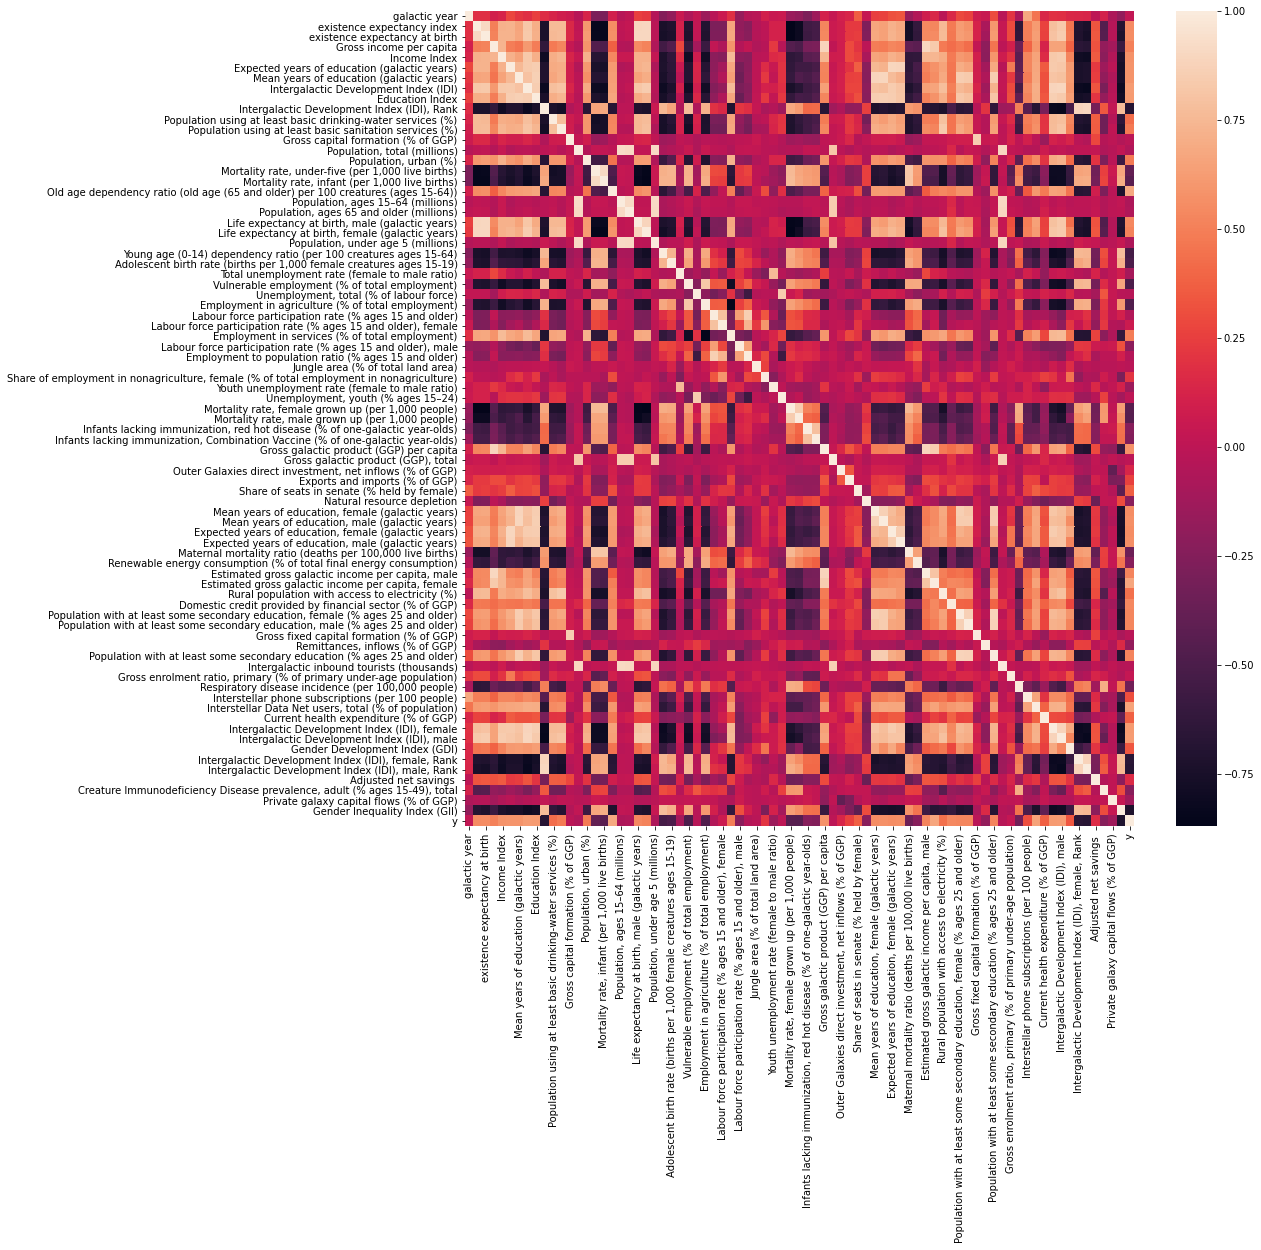

In [11]:
plt.figure(figsize=(15, 15))
sns.heatmap(train.corr());

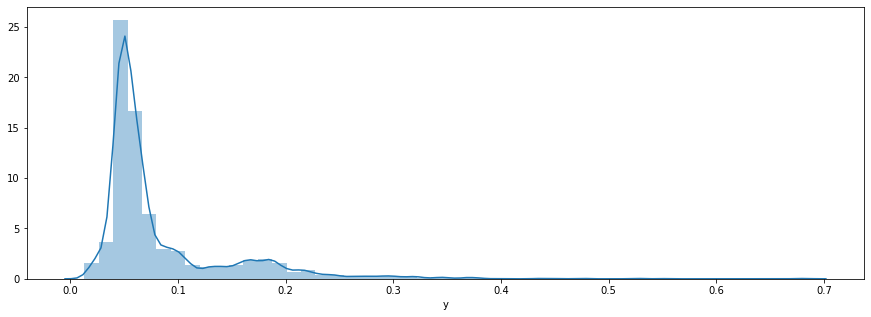

In [12]:
plt.figure(figsize=(15, 5))
sns.distplot(train['y']);

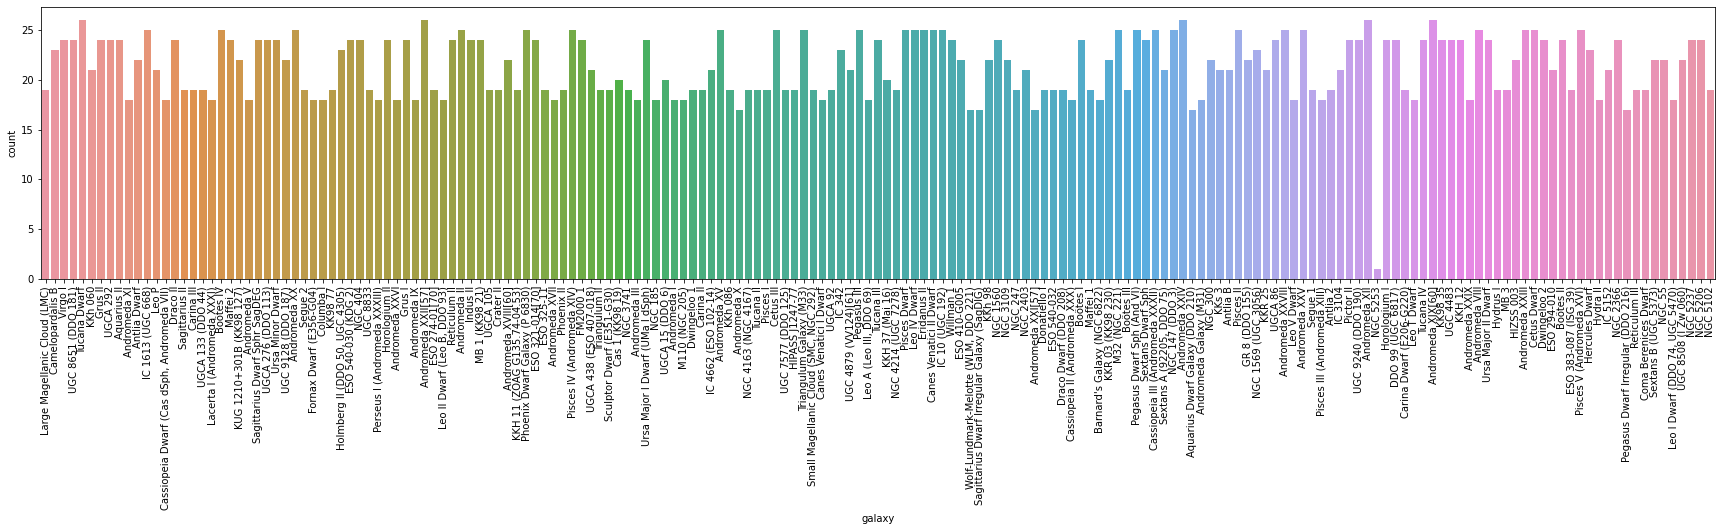

In [13]:
plt.figure(figsize=(30, 5))
galaxy = sns.countplot(train['galaxy'])
galaxy.set_xticklabels(galaxy.get_xticklabels(), rotation=90);
# sns.countplot(test['galaxy'])

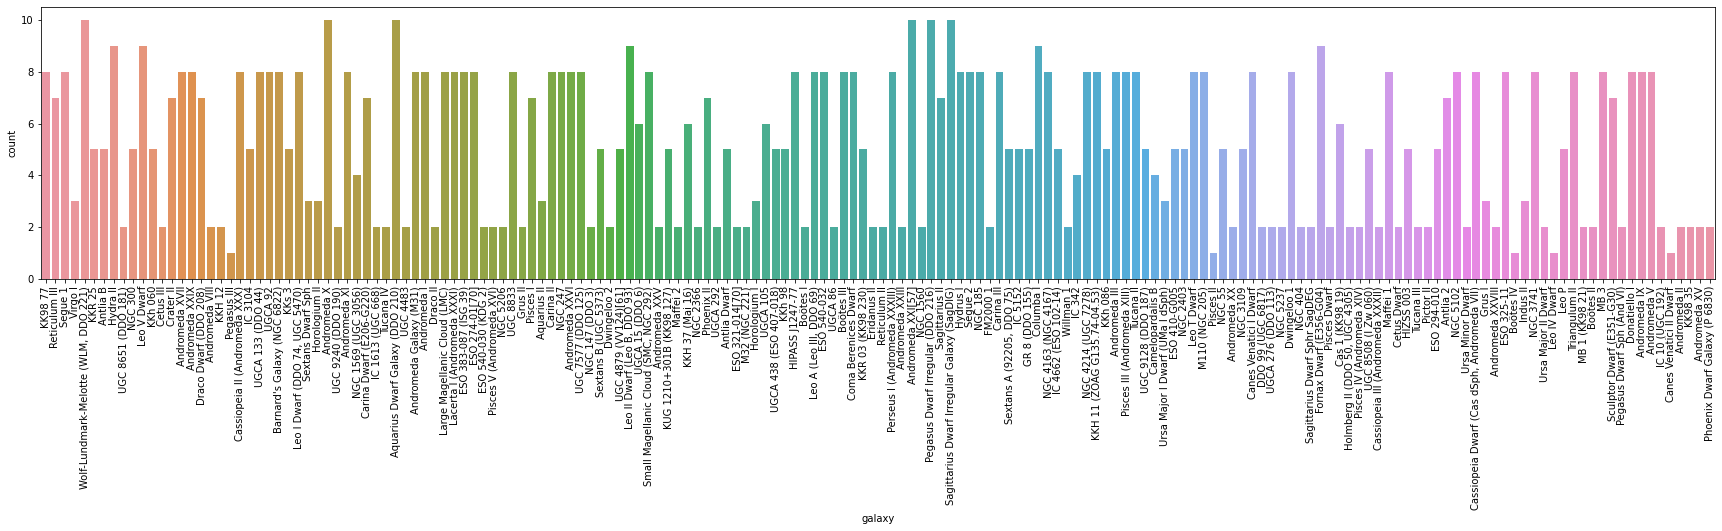

In [14]:
plt.figure(figsize=(30, 5))
galaxy = sns.countplot(test['galaxy'])
galaxy.set_xticklabels(galaxy.get_xticklabels(), rotation=90);

In [15]:
train.drop(['y'], axis=1).corrwith(train['y']).sort_values(ascending=False)

Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))           0.67998
Estimated gross galactic income per capita, female                                         0.66746
Interstellar Data Net users, total (% of population)                                       0.65182
Intergalactic Development Index (IDI)                                                      0.62511
Intergalactic Development Index (IDI), male                                                0.62270
Intergalactic Development Index (IDI), female                                              0.61497
Education Index                                                                            0.61394
Expected years of education (galactic years)                                               0.58407
Mean years of education (galactic years)                                                   0.58386
Income Index                                                                               0.57997
Gross gala

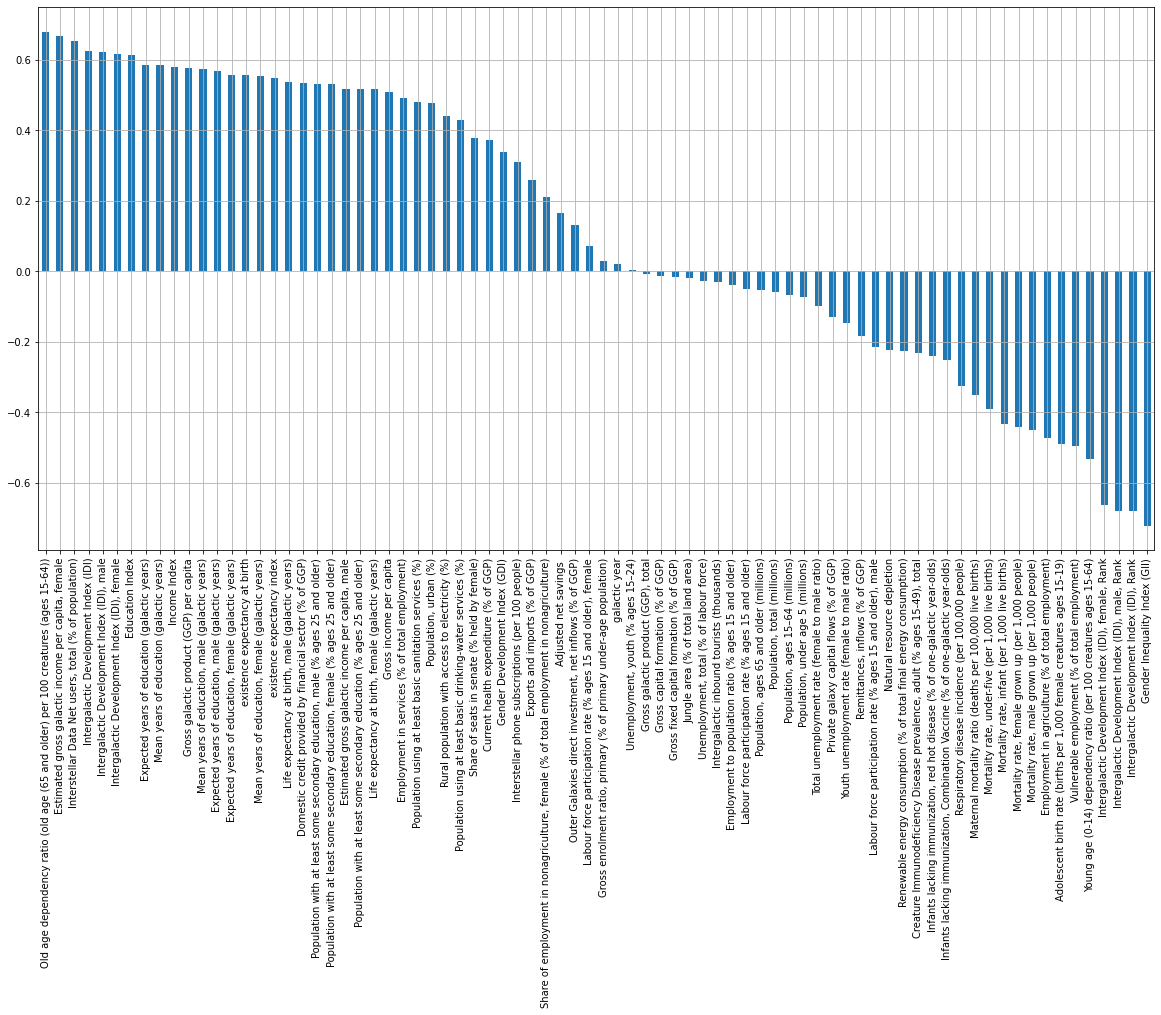

In [16]:
plt.figure(figsize=(20, 10))
correlation_plot = train.drop(['y'], axis=1).corrwith(train['y']).sort_values(ascending=False).plot.bar(grid=True)
correlation_plot.set_xticklabels(correlation_plot.get_xticklabels(), rotation=90);

In [17]:
for i in train.columns:
    print(i)

galactic year
galaxy
existence expectancy index
existence expectancy at birth
Gross income per capita
Income Index
Expected years of education (galactic years)
Mean years of education (galactic years)
Intergalactic Development Index (IDI)
Education Index
Intergalactic Development Index (IDI), Rank
Population using at least basic drinking-water services (%)
Population using at least basic sanitation services (%)
Gross capital formation (% of GGP)
Population, total (millions)
Population, urban (%)
Mortality rate, under-five (per 1,000 live births)
Mortality rate, infant (per 1,000 live births)
Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))
Population, ages 15–64 (millions)
Population, ages 65 and older (millions)
Life expectancy at birth, male (galactic years)
Life expectancy at birth, female (galactic years)
Population, under age 5 (millions)
Young age (0-14) dependency ratio (per 100 creatures ages 15-64)
Adolescent birth rate (births per 1,000 female 

In [0]:
pd.set_option('display.max_rows', 10)

In [0]:
# full_train = train.fillna(train.interpolate(inplace=False))
# full_test = test.fillna(test.interpolate(inplace=False))
# full_train = train.fillna(train.mean())
# full_test = test.fillna(test.mean())

In [0]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)

full_train = imputer.fit_transform(train.drop(['galaxy', 'y'], axis=1))
full_train = pd.DataFrame(data=full_train, columns=train.drop(['galaxy', 'y'], axis=1).columns)
full_train['galaxy'] = train['galaxy']
full_train['y'] = train['y']

full_test = imputer.transform(test.drop(['galaxy'], axis=1))
full_test = pd.DataFrame(data=full_test, columns=test.drop(['galaxy'], axis=1).columns)
full_test['galaxy'] = test['galaxy']

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_train = scaler.fit_transform(full_train.drop(['galaxy', 'y'], axis=1))
scaled_train = pd.DataFrame(data=scaled_train, columns=train.drop(['galaxy', 'y'], axis=1).columns)
scaled_train['galaxy'] = train['galaxy']
scaled_train['y'] = train['y']

scaled_test = scaler.transform(full_test.drop(['galaxy'], axis=1))
scaled_test = pd.DataFrame(data=scaled_test, columns=test.drop(['galaxy'], axis=1).columns)
scaled_test['galaxy'] = test['galaxy']

In [0]:
# from sklearn.preprocessing import PolynomialFeatures

# poly = PolynomialFeatures(2)

# poly_train = poly.fit_transform(scaled_train.drop(['galaxy', 'y'], axis=1))
# poly_train = pd.DataFrame(data=poly_train, columns=poly.get_feature_names(scaled_train.columns))
# poly_train['galaxy'] = train['galaxy']
# poly_train['y'] = train['y']

# poly_test = poly.transform(scaled_test.drop(['galaxy'], axis=1))
# poly_test = pd.DataFrame(data=poly_test, columns=poly.get_feature_names(scaled_test.columns))
# poly_test['galaxy'] = test['galaxy']

In [0]:
full_train = pd.concat([full_train, pd.get_dummies(full_train['galaxy'])], axis=1).drop(['galaxy'], axis=1)
full_test = pd.concat([full_test, pd.get_dummies(full_test['galaxy'])], axis=1).drop(['galaxy'], axis=1)

scaled_train = pd.concat([scaled_train, pd.get_dummies(scaled_train['galaxy'])], axis=1).drop(['galaxy'], axis=1)
scaled_test = pd.concat([scaled_test, pd.get_dummies(scaled_test['galaxy'])], axis=1).drop(['galaxy'], axis=1)

In [24]:
from collections import Counter

galaxy_list = []
new_test_galaxy = []
for i in train.galaxy.unique():
    galaxy_list.append(i)
for i in test.galaxy.unique():
    galaxy_list.append(i)

for key, value in Counter(galaxy_list).items():
    if value == 1:
        print(key)
        new_test_galaxy.append(key)

Tucana Dwarf
Andromeda XXII[57]
Andromeda XVIII[60]
Triangulum Galaxy (M33)
Andromeda XXIV
Andromeda XII
NGC 5253
Andromeda XIX[60]
Hercules Dwarf


In [0]:
for i in new_test_galaxy:
    full_test[i] = 0
    scaled_test[i] = 0

In [0]:
full_train = full_train.reindex(sorted(full_train.columns), axis=1)
full_test = full_test.reindex(sorted(full_test.columns), axis=1)

scaled_train = scaled_train.reindex(sorted(scaled_train.columns), axis=1)
scaled_test = scaled_test.reindex(sorted(scaled_test.columns), axis=1)

In [27]:
scaled_train

,Adjusted net savings,"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",Andromeda Galaxy (M31),Andromeda I,Andromeda II,Andromeda III,Andromeda IX,Andromeda V,Andromeda VIII,Andromeda X,Andromeda XI,Andromeda XII,Andromeda XIX[60],Andromeda XV,Andromeda XVII,Andromeda XVIII[60],Andromeda XX,Andromeda XXIII,Andromeda XXII[57],Andromeda XXIV,Andromeda XXIX,Andromeda XXI[57],Andromeda XXV,Andromeda XXVI,Andromeda XXVIII,Antlia 2,Antlia B,Antlia Dwarf,Aquarius Dwarf Galaxy (DDO 210),Aquarius II,Barnard's Galaxy (NGC 6822),Boötes I,Boötes II,Boötes III,Boötes IV,Camelopardalis B,Canes Venatici I Dwarf,Canes Venatici II Dwarf,Carina Dwarf (E206-G220),Carina II,...,Share of seats in senate (% held by female),"Small Magellanic Cloud (SMC, NGC 292)",Total unemployment rate (female to male ratio),Triangulum Galaxy (M33),Triangulum II,Tucana Dwarf,Tucana II,Tucana III,Tucana IV,UGC 4483,UGC 4879 (VV124)[61],UGC 7577 (DDO 125),UGC 8508 (I Zw 060),UGC 8651 (DDO 181),UGC 8833,UGC 9128 (DDO 187),UGC 9240 (DDO 190),UGCA 105,UGCA 133 (DDO 44),UGCA 15 (DDO 6),UGCA 276 (DDO 113),UGCA 292,UGCA 438 (ESO 407-018),UGCA 86,UGCA 92,"Unemployment, total (% of labour force)","Unemployment, youth (% ages 15–24)",Ursa Major I Dwarf (UMa I dSph),Ursa Major II Dwarf,Ursa Minor Dwarf,Virgo I,Vulnerable employment (% of total employment),Willman 1,"Wolf-Lundmark-Melotte (WLM, DDO 221)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),Youth unemployment rate (female to male ratio),existence expectancy at birth,existence expectancy index,galactic year,y
0,0.48121,1.23148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-0.98605,0,0.16205,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.46279,-0.89817,0,0,0,0,-1.24680,0,0,0.84217,0.30996,-1.30696,-1.50188,-1.53848,0.05259
1,-0.18124,-0.16957,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0.03783,0,-0.35819,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.58848,0.90182,0,0,0,0,0.07714,0,0,0.38941,0.19392,0.40241,-0.33497,-1.53848,0.05987
2,-0.01196,2.44269,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-0.87345,0,-0.77074,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.03040,-0.49244,0,0,0,1,1.13219,0,0,1.57202,-1.00562,-1.64680,-1.31223,-1.53848,0.05045
3,0.83004,1.75863,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-0.33443,0,-0.57728,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.71077,-0.85654,0,0,0,0,1.58944,0,0,0.81605,-0.04815,-2.33871,-1.95032,-1.53848,0.04939
4,0.72459,-1.22771,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.43465,0,-0.45212,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.80773,1.86042,0,0,0,0,-0.06460,0,0,-1.18885,0.22737,0.47865,0.73147,-1.53848,0.15425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3860,0.44162,0.44379,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.12424,0,0.12422,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.22032,-0.28472,0,0,0,0,-0.67184,0,0,-0.63805,0.89408,0.57708,0.96868,2.06592,0.04232
3861,-0.05602,0.39671,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2.39007,0,-0.94432,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.66325,-1.02567,0,0,0,0,0.09865,0,0,-0.93123,-0.35459,-0.08784,0.40295,2.06592,0.03672
3862,0.58884,-1.38013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1.04616,0,-0.02067,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.58700,-0.64171,0,0,0,0,-0.96690,0,0,-1.46547,-1.15449,1.60082,1.00836,2.06592,0.16627
3863,1.51602,-0.26663,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [0]:
# full_train = full_train.drop(['galaxy', 'galactic year'], axis=1)
# full_test = full_test.drop(['galaxy', 'galactic year'], axis=1)
# scaled_train = scaled_train.drop(['galaxy', 'galactic year'], axis=1)
# scaled_test = scaled_test.drop(['galaxy', 'galactic year'], axis=1)

In [0]:
def normilize_column_names(string):
    new = ""
    for i in string:
        if i.isalnum() == True or i == " ":
            new += i
    return new

new_names = {}
for i in full_train.columns:
    new_names[i] = normilize_column_names(i)

full_train.rename(columns=new_names, inplace=True)
full_test.rename(columns=new_names, inplace=True)

scaled_train.rename(columns=new_names, inplace=True)
scaled_test.rename(columns=new_names, inplace=True)

In [30]:
full_train

,Adjusted net savings,Adolescent birth rate births per 1000 female creatures ages 1519,Andromeda Galaxy M31,Andromeda I,Andromeda II,Andromeda III,Andromeda IX,Andromeda V,Andromeda VIII,Andromeda X,Andromeda XI,Andromeda XII,Andromeda XIX60,Andromeda XV,Andromeda XVII,Andromeda XVIII60,Andromeda XX,Andromeda XXIII,Andromeda XXII57,Andromeda XXIV,Andromeda XXIX,Andromeda XXI57,Andromeda XXV,Andromeda XXVI,Andromeda XXVIII,Antlia 2,Antlia B,Antlia Dwarf,Aquarius Dwarf Galaxy DDO 210,Aquarius II,Barnards Galaxy NGC 6822,Boötes I,Boötes II,Boötes III,Boötes IV,Camelopardalis B,Canes Venatici I Dwarf,Canes Venatici II Dwarf,Carina Dwarf E206G220,Carina II,...,Share of seats in senate held by female,Small Magellanic Cloud SMC NGC 292,Total unemployment rate female to male ratio,Triangulum Galaxy M33,Triangulum II,Tucana Dwarf,Tucana II,Tucana III,Tucana IV,UGC 4483,UGC 4879 VV12461,UGC 7577 DDO 125,UGC 8508 I Zw 060,UGC 8651 DDO 181,UGC 8833,UGC 9128 DDO 187,UGC 9240 DDO 190,UGCA 105,UGCA 133 DDO 44,UGCA 15 DDO 6,UGCA 276 DDO 113,UGCA 292,UGCA 438 ESO 407018,UGCA 86,UGCA 92,Unemployment total of labour force,Unemployment youth ages 1524,Ursa Major I Dwarf UMa I dSph,Ursa Major II Dwarf,Ursa Minor Dwarf,Virgo I,Vulnerable employment of total employment,Willman 1,WolfLundmarkMelotte WLM DDO 221,Young age 014 dependency ratio per 100 creatures ages 1564,Youth unemployment rate female to male ratio,existence expectancy at birth,existence expectancy index,galactic year,y
0,26.90015,174.61790,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15.88515,0,2.86583,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.42821,20.03365,0,0,0,0,37.94761,0,0,98.21607,2.39682,63.12520,0.62866,990025.00000,0.05259
1,19.17793,109.89238,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,24.61405,0,2.37757,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18.22847,39.43224,0,0,0,0,72.62669,0,0,88.32257,2.32720,81.00499,0.81808,990025.00000,0.05987
2,21.15127,230.57367,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,16.84511,0,1.99038,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.01802,24.40616,0,0,0,1,100.26252,0,0,114.16400,1.60759,59.57053,0.65944,990025.00000,0.05045
3,30.96652,198.97133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21.44046,0,2.17195,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,10.75432,20.48230,0,0,0,0,112.23953,0,0,97.64523,2.18199,52.33329,0.55586,990025.00000,0.04939
4,29.73737,61.00865,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,36.52246,0,2.28942,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25.24242,49.76314,0,0,0,0,68.91403,0,0,53.83587,2.34727,81.80246,0.99120,990025.00000,0.15425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3860,26.43872,138.22837,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,50.92670,0,2.83032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.82309,26.64482,0,0,0,0,53.00794,0,0,65.87154,2.74723,82.83206,1.02970,1015056.00000,0.04232
3861,20.63765,136.05358,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,44.66766,0,1.82748,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.02772,18.65955,0,0,0,0,73.19013,0,0,59.46532,1.99815,75.87710,0.93787,1015056.00000,0.03672
3862,28.15486,53.96696,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,33.21038,0,2.69434,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.46632,22.79750,0,0,0,0,45.27918,0,0,47.79151,1.51829,93.54028,1.03614,1015056.00000,0.16627
3863,38.96316,105.40862,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,31.0158

# Models

In [0]:
import xgboost
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [0]:
X_train, X_test, y_train, y_test = train_test_split(full_train.drop(['y'], axis=1), full_train['y'], test_size=0.33, random_state=42)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(scaled_train.drop(['y'], axis=1), scaled_train['y'], test_size=0.33, random_state=42)

In [0]:
model_error = {}

In [34]:
%%time
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train_scaled)

pred_lr = model_lr.predict(X_test_scaled)
lr_rmse = np.sqrt(mean_squared_error(y_test_scaled, pred_lr))
r2_lr = r2_score(y_test_scaled, pred_lr)
model_error['LinearRegression'] = lr_rmse
print(lr_rmse, r2_lr)

0.014845499143462462 0.9445715469191519
CPU times: user 107 ms, sys: 30.9 ms, total: 138 ms
Wall time: 78.4 ms


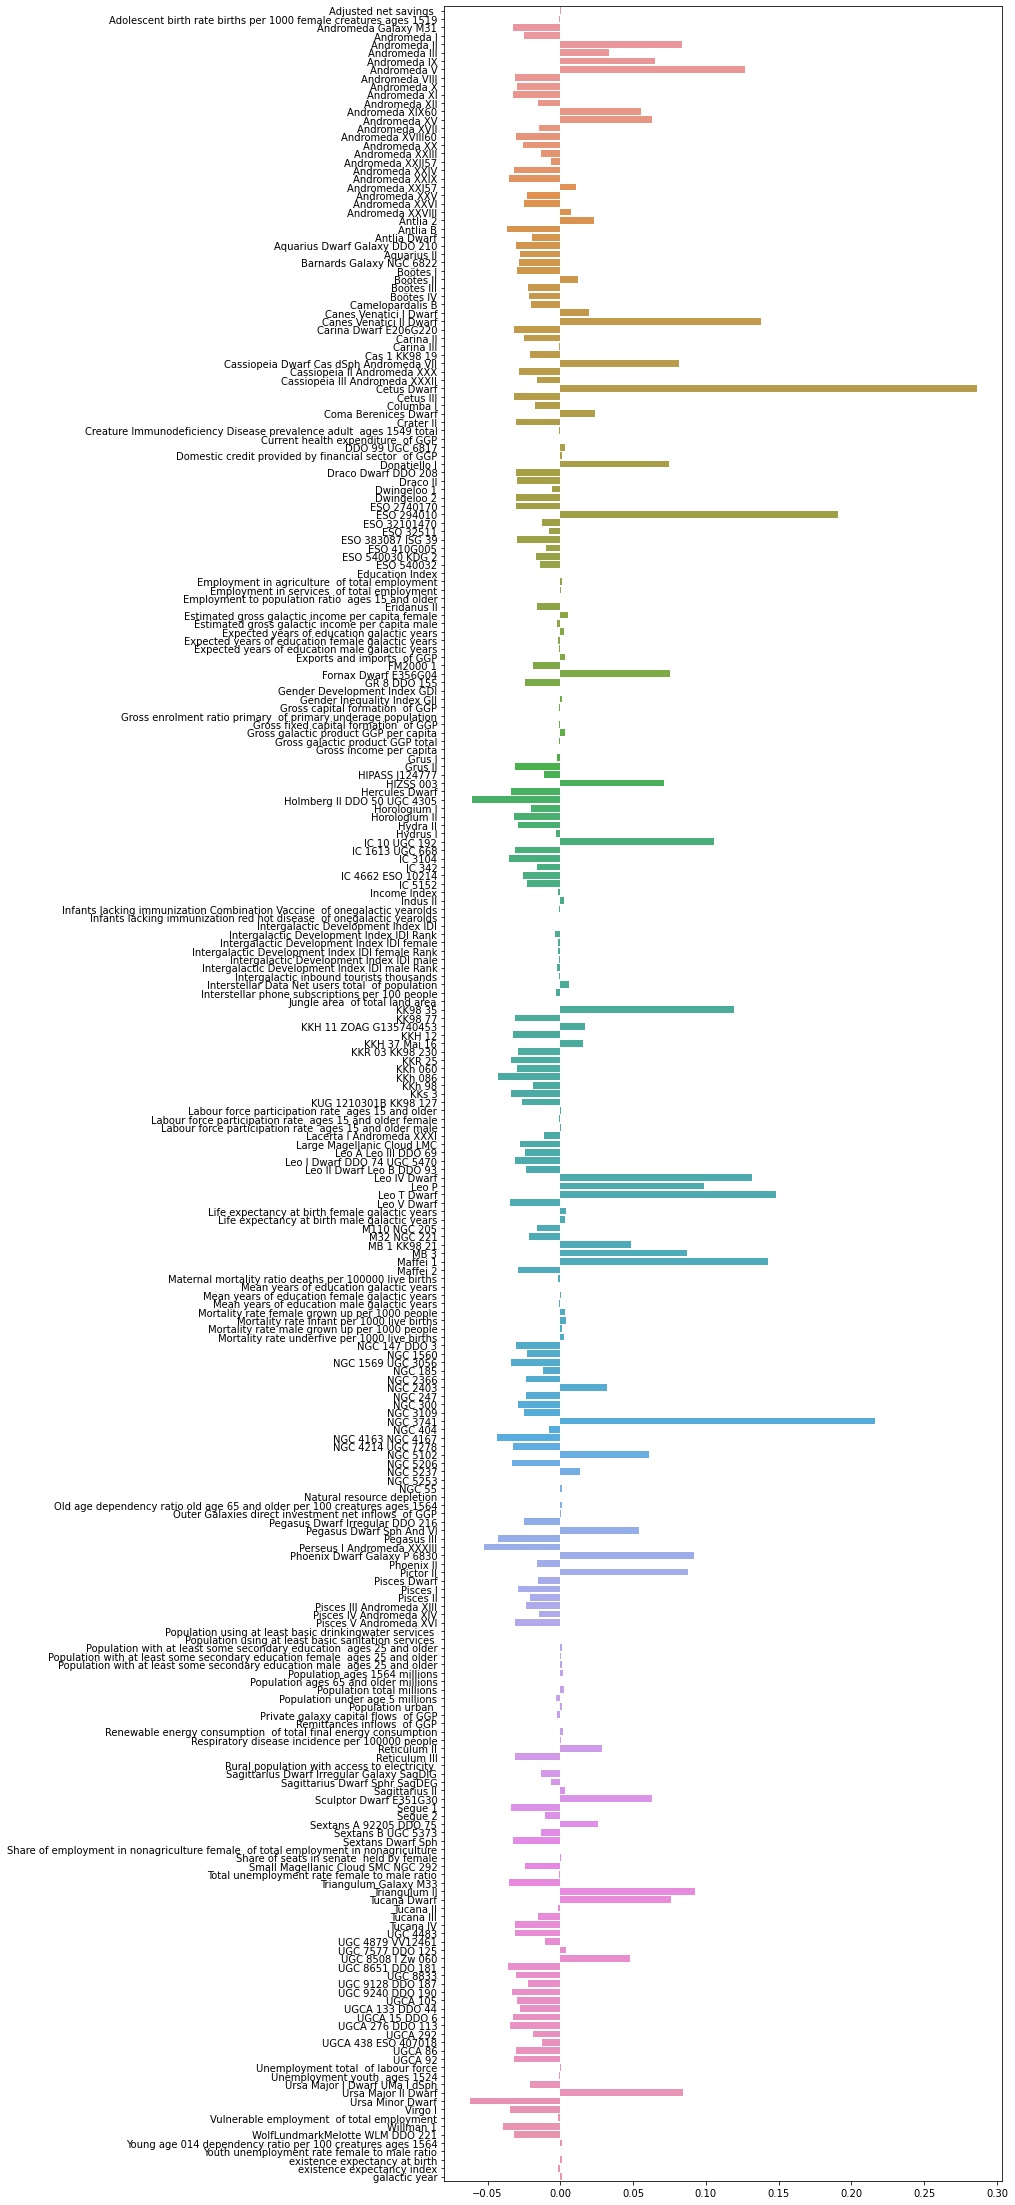

In [35]:
plt.figure(figsize=(10, 40))
sns.barplot(x=model_lr.coef_, y=scaled_train.drop(['y'], axis=1).columns);

In [36]:
%%time
model_ridge = Ridge(alpha=0.5)
model_ridge.fit(X_train_scaled, y_train_scaled)

pred_ridge = model_ridge.predict(X_test_scaled)
ridge_rmse = np.sqrt(mean_squared_error(y_test_scaled, pred_ridge))
r2_ridge = r2_score(y_test_scaled, pred_ridge)
model_error['Ridge LinearRegression'] = ridge_rmse
print(ridge_rmse, r2_ridge)

0.015393022533035348 0.9404075885245661
CPU times: user 35.6 ms, sys: 14 ms, total: 49.5 ms
Wall time: 50.2 ms


In [37]:
%%time
model_lasso = Lasso(alpha=0.5)
model_lasso.fit(X_train_scaled, y_train_scaled)

pred_lasso = model_lasso.predict(X_test_scaled)
lasso_rmse = np.sqrt(mean_squared_error(y_test_scaled, pred_lasso))
r2_lasso = r2_score(y_test_scaled, pred_lasso)
model_error['Lasso LinearRegression'] = lasso_rmse
print(lasso_rmse, r2_lasso)

0.06306481919760473 -0.00027049759759290026
CPU times: user 26.7 ms, sys: 13 ms, total: 39.7 ms
Wall time: 40.6 ms


In [38]:
%%time
model_lsvr = LinearSVR()
model_lsvr.fit(X_train_scaled, y_train_scaled)

pred_lsvr = model_lsvr.predict(X_test_scaled)
lsvr_rmse = np.sqrt(mean_squared_error(y_test_scaled, pred_lsvr))
r2_lsvr = r2_score(y_test_scaled, pred_lsvr)
model_error['Linear SVRegressor'] = lsvr_rmse
print(lsvr_rmse, r2_lsvr)

0.018590122929153706 0.9130824105964507
CPU times: user 825 ms, sys: 48 ms, total: 873 ms
Wall time: 838 ms


In [39]:
%%time
model_svr = SVR()
model_svr.fit(X_train_scaled, y_train_scaled)

pred_svr = model_svr.predict(X_test_scaled)
svr_rmse = np.sqrt(mean_squared_error(y_test_scaled, pred_svr))
r2_svr = r2_score(y_test_scaled, pred_svr)
model_error['SVRegressor'] = svr_rmse
print(svr_rmse, r2_svr)

0.06933392201811792 -0.209023340509348
CPU times: user 202 ms, sys: 82 ms, total: 284 ms
Wall time: 191 ms


In [40]:
%%time
model_sgd = SGDRegressor()
model_sgd.fit(X_train_scaled, y_train_scaled)

pred_sgd = model_sgd.predict(X_test_scaled)
sgd_rmse = np.sqrt(mean_squared_error(y_test_scaled, pred_sgd))
r2_sgd = r2_score(y_test_scaled, pred_sgd)
model_error['SGDRegressor'] = sgd_rmse
print(sgd_rmse, r2_sgd)

0.03741246363950709 0.6479731696180026
CPU times: user 25.1 ms, sys: 4.8 ms, total: 29.9 ms
Wall time: 28.2 ms


In [41]:
%%time
model_xgboost = xgboost.XGBRegressor(max_depth=8)
model_xgboost.fit(X_train, y_train)

pred_xgb = model_xgboost.predict(X_test)
xgboost_rmse = np.sqrt(mean_squared_error(y_test, pred_xgb))
r2_xgb = r2_score(y_test, pred_xgb)
model_error['XGBoost'] = xgboost_rmse
print(xgboost_rmse, r2_xgb)

[12:51:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.021699553995750406 0.8815746259833465
CPU times: user 4.24 s, sys: 88.6 ms, total: 4.33 s
Wall time: 4.24 s


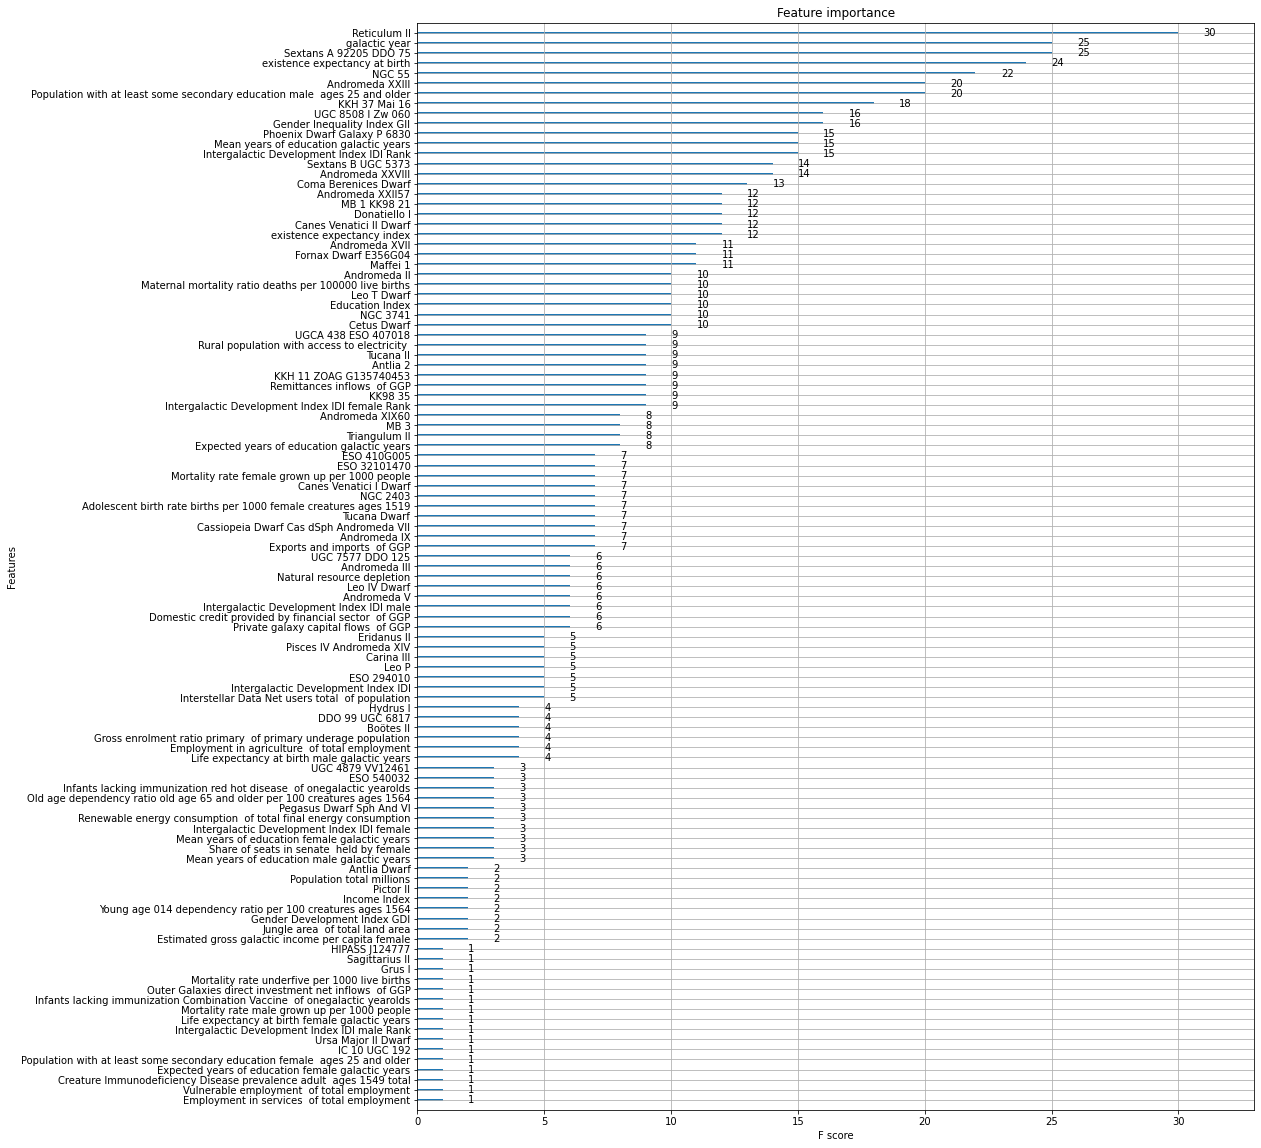

In [42]:
plt.rcParams["figure.figsize"] = (15, 20)
xgboost.plot_importance(model_xgboost) # график важности признаков

In [43]:
%%time
model_rf = RandomForestRegressor(n_estimators=200)
model_rf.fit(X_train, y_train)

pred_rf = model_rf.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, pred_rf))
r2_rf = r2_score(y_test, pred_rf)
model_error['RandomForest'] = rf_rmse
print(rf_rmse, r2_rf)

0.025936843225416194 0.83080895076751
CPU times: user 31.1 s, sys: 6.39 ms, total: 31.1 s
Wall time: 31.2 s


In [44]:
full_rmse = 0
for key, value in model_error.items():
  full_rmse += value
  print("RMSE ошибка модели {} - {}".format(key, str(value)))
print("Среднее качество моделей - {}".format(str(full_rmse / len(model_error))))

RMSE ошибка модели LinearRegression - 0.014845499143462462
RMSE ошибка модели Ridge LinearRegression - 0.015393022533035348
RMSE ошибка модели Lasso LinearRegression - 0.06306481919760473
RMSE ошибка модели Linear SVRegressor - 0.018590122929153706
RMSE ошибка модели SVRegressor - 0.06933392201811792
RMSE ошибка модели SGDRegressor - 0.03741246363950709
RMSE ошибка модели XGBoost - 0.021699553995750406
RMSE ошибка модели RandomForest - 0.025936843225416194
Среднее качество моделей - 0.03328453083525598


# Submission

# LinearRegression

In [45]:
pred_index_lr = model_lr.predict(scaled_test)
sub_lr = pd.DataFrame({
    'Index':test.index,
    'pred':pred_index_lr,
    'opt_pred':0,
    'eei':full_test['existence expectancy index']
})
n_low_eei_lr = sub_lr.loc[sub_lr.eei < 0.7].shape[0]
n_high_eei_lr = sub_lr.loc[sub_lr.eei >= 0.7].shape[0]
print(n_low_eei_lr, n_high_eei_lr)
sub_lr.loc[sub_lr.eei < 0.7, 'opt_pred'] = 80           # 66*80 = 5280 - >10%, <100 each
sub_lr.loc[sub_lr.eei >= 0.7, 'opt_pred'] = ((50000 - (n_low_eei_lr * 80)) / n_high_eei_lr)        # The rest to high eei gs
sub_lr = sub_lr.drop('eei', axis=1)

66 824


In [46]:
sub_lr.to_csv('sub_lr.csv', index=False)
sub_lr.head()

,Index,pred,opt_pred
0,0,0.03537,80.00000
1,1,0.03253,80.00000
2,2,0.03866,80.00000
3,3,0.03912,80.00000
4,4,0.04699,80.00000


In [47]:
sub_lr.opt_pred.sum()

49999.99999999999

In [48]:
sub_lr.loc[sub_lr.opt_pred > 99]

,Index,pred,opt_pred


In [49]:
sub_lr.loc[sub_lr.opt_pred < 1]

,Index,pred,opt_pred


# XGBoost

In [50]:
pred_index_xgb = model_xgboost.predict(full_test)
sub_xgb = pd.DataFrame({
    'Index':test.index,
    'pred':pred_index_xgb,
    'opt_pred':0,
    'eei':full_test['existence expectancy index']
})
n_low_eei_xgb = sub_xgb.loc[sub_xgb.eei < 0.7].shape[0]
n_high_eei_xgb = sub_xgb.loc[sub_xgb.eei >= 0.7].shape[0]
print(n_low_eei_xgb, n_high_eei_xgb)
sub_xgb.loc[sub_xgb.eei < 0.7, 'opt_pred'] = 99
sub_xgb.loc[sub_xgb.eei >= 0.7, 'opt_pred'] = ((50000 - (n_low_eei_xgb * 99)) / n_high_eei_xgb) # The rest to high eei gs
sub_xgb = sub_xgb.drop('eei', axis=1)

66 824


In [51]:
sub_xgb.to_csv('sub_xgb.csv', index=False)
sub_xgb.head()

,Index,pred,opt_pred
0,0,0.04638,99.00000
1,1,0.04638,99.00000
2,2,0.04638,99.00000
3,3,0.04638,99.00000
4,4,0.04638,99.00000


In [52]:
sub_xgb

,Index,pred,opt_pred
0,0,0.04638,99.00000
1,1,0.04638,99.00000
2,2,0.04638,99.00000
3,3,0.04638,99.00000
4,4,0.04638,99.00000
...,...,...,...
885,885,0.05501,52.75000
886,886,0.05501,52.75000
887,887,0.05501,52.75000
888,888,0.05778,52.75000


In [53]:
sub_xgb.opt_pred.sum()

50000.0

In [54]:
sub_xgb.loc[sub_xgb.opt_pred > 99]

,Index,pred,opt_pred


In [55]:
sub_xgb.loc[sub_xgb.opt_pred < 1]

,Index,pred,opt_pred


# Оптимизация решения

In [70]:
pred_index_opt = model_lr.predict(scaled_test)
sub_opt = pd.DataFrame({
    'Index':test.index,
    'pred':pred_index_opt,
    'std_opt_pred':0,
    'opt_pred':0,
    'eei':full_test['existence expectancy index'],
    'potential_for_index_increase':-np.log(pred_index_opt + 0.01) + 3
})

energy_to_low_galaxy = 76 # 76 * 66 = 5016 = 10%
energy_to_high_galaxies = 40000
extra_energy = 50000 - energy_to_high_galaxies 

n_low_eei_opt = sub_opt.loc[sub_opt.eei < 0.7].shape[0]
n_high_eei_opt = sub_opt.loc[sub_opt.eei >= 0.7].shape[0]

print(n_low_eei_opt, n_high_eei_opt, (energy_to_high_galaxies - (n_low_eei_opt * energy_to_low_galaxy)) / n_high_eei_opt)

sub_opt.loc[sub_opt.eei < 0.7, 'std_opt_pred'] = energy_to_low_galaxy

sub_opt.loc[sub_opt.eei >= 0.7, 'std_opt_pred'] = (energy_to_high_galaxies - (n_low_eei_opt * energy_to_low_galaxy)) / n_high_eei_opt

sub_opt['index_increase'] = np.log10(extra_energy * sub_opt['potential_for_index_increase'] ** 2 / 1000)

sub_opt['opt_pred_increase'] = (sub_opt['std_opt_pred'] / 10) * sub_opt['index_increase']

sub_opt['opt_pred'] = sub_opt['std_opt_pred'] + sub_opt['opt_pred_increase']

# sub_opt['opt_pred_clip'] = sub_opt.opt_pred.clip(0, 99)
print(sub_opt.std_opt_pred.sum())
print(sub_opt.opt_pred.sum())

sub_opt.head()

66 824 42.45631067961165
40000.0
49952.94560342278


,Index,pred,std_opt_pred,opt_pred,eei,potential_for_index_increase,index_increase,opt_pred_increase
0,0,0.03537,76.00000,95.52931,0.45609,6.09288,2.56965,19.52931
1,1,0.03253,76.00000,95.59891,0.52983,6.15747,2.57880,19.59891
2,2,0.03866,76.00000,95.45299,0.56098,6.02285,2.55960,19.45299
3,3,0.03912,76.00000,95.44266,0.56591,6.01343,2.55824,19.44266
4,4,0.04699,76.00000,95.27751,0.58827,5.86486,2.53651,19.27751


In [71]:
sub_opt.loc[sub_opt.eei >= 0.7]

,Index,pred,std_opt_pred,opt_pred,eei,potential_for_index_increase,index_increase,opt_pred_increase
66,66,0.04287,42.45631,53.27231,0.70396,5.93991,2.54756,10.81600
67,67,0.03652,42.45631,53.35094,0.70437,6.06792,2.56608,10.89463
68,68,0.04100,42.45631,53.29458,0.70543,5.97590,2.55281,10.83827
69,69,0.03825,42.45631,53.32871,0.70747,6.03145,2.56084,10.87240
70,70,0.04922,42.45631,53.20120,0.71399,5.82647,2.53081,10.74489
...,...,...,...,...,...,...,...,...
885,885,0.05764,42.45631,53.11605,1.00781,5.69348,2.51076,10.65974
886,886,0.06445,42.45631,53.05343,1.00781,5.59762,2.49601,10.59712
887,887,0.08002,42.45631,52.92614,1.00781,5.40770,2.46602,10.46983
888,888,0.07369,42.45631,52.97555,1.00781,5.48063,2.47766,10.51923


In [72]:
sub_opt.describe()

,Index,pred,std_opt_pred,opt_pred,eei,potential_for_index_increase,index_increase,opt_pred_increase
count,890.00000,890.00000,890.00000,890.00000,890.00000,890.00000,890.00000,890.00000
mean,444.50000,0.08302,44.94382,56.12691,0.92435,5.55110,2.48415,11.18308
std,257.06517,0.06595,8.79428,11.13921,0.13462,0.55046,0.09138,2.36909
min,0.00000,0.01840,42.45631,51.65652,0.45609,3.83258,2.16698,9.20021
25%,222.25000,0.04214,42.45631,52.84213,0.83446,5.28589,2.44624,10.38582
50%,444.50000,0.05653,42.45631,53.12826,0.94749,5.71017,2.51330,10.67195
75%,666.75000,0.09168,42.45631,53.29525,1.02245,5.95386,2.54960,10.83894
max,889.00000,0.42493,76.00000,95.87614,1.25051,6.56132,2.63398,19.87614


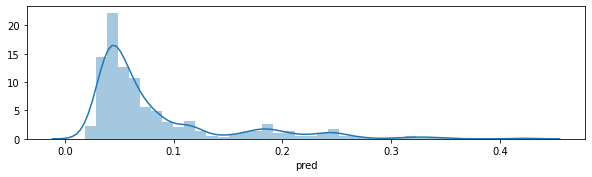

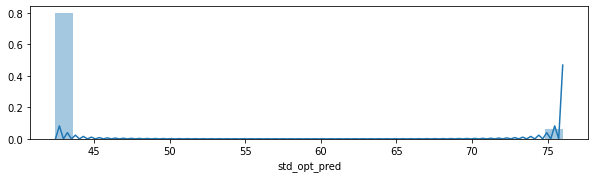

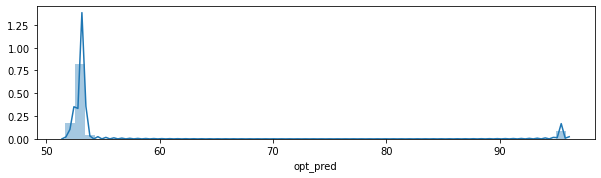

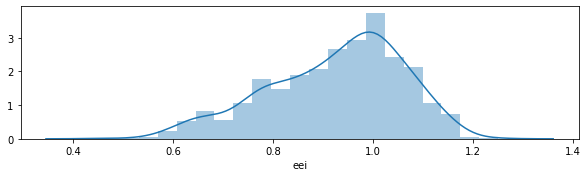

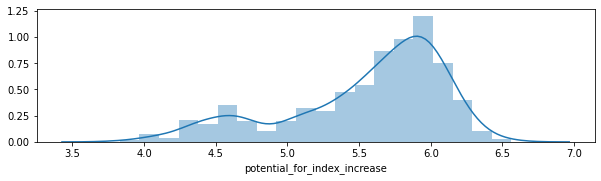

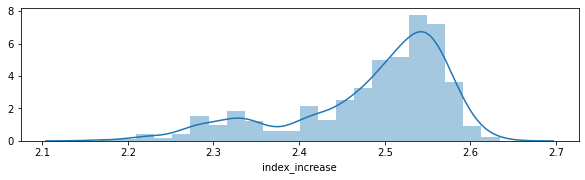

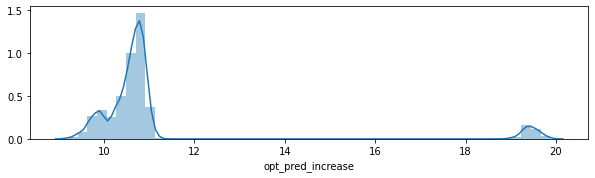

In [73]:
j = 1
for i in sub_opt.drop(['Index'], axis=1).columns:
    plt.figure(figsize=(10, 20))
    plt.subplot(7, 1, j)
    sns.distplot(sub_opt[i])
    j += 1

In [74]:
sub_opt = sub_opt.drop(['eei', 'potential_for_index_increase', 'std_opt_pred', 'index_increase', 'opt_pred_increase'], axis=1)
sub_opt.to_csv('sub_opt.csv', index=False)
sub_opt.head()

,Index,pred,opt_pred
0,0,0.03537,95.52931
1,1,0.03253,95.59891
2,2,0.03866,95.45299
3,3,0.03912,95.44266
4,4,0.04699,95.27751


In [75]:
sub_opt.opt_pred.sum()

49952.94560342278

In [76]:
sub_xgb.loc[sub_xgb.opt_pred > 99]

,Index,pred,opt_pred


In [77]:
sub_xgb.loc[sub_xgb.opt_pred < 1]

,Index,pred,opt_pred
